In [0]:
data=[("John",25),("Jane",30),("Sam",22)]
df=spark.createDataFrame(data,["Name","Age"])
display(df)

Name,Age
John,25
Jane,30
Sam,22


In [0]:
df.groupBy("Age").count().display()

Age,count
25,1
30,1
22,1


In [0]:
df1 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/azuser2141_mml.local@techademy.com/data-1.csv")
df1.show(10)
df1.printSchema()

+----------+-------+------+----+---------+---------+
|   FL_DATE|CARRIER|ORIGIN|DEST|DEP_DELAY|ARR_DELAY|
+----------+-------+------+----+---------+---------+
|2023-09-01|     AA|   ATL| DFW|        5|       10|
|2023-09-01|     UA|   LAX| JFK|       -3|        0|
|2023-09-01|     DL|   SFO| ORD|        7|       15|
|2023-09-02|     AA|   DFW| LAX|        0|       -5|
|2023-09-02|     UA|   JFK| ATL|       -2|        0|
|2023-09-02|     DL|   ORD| LAX|       20|       30|
|2023-09-03|     AA|   LAX| SFO|       10|       12|
|2023-09-03|     UA|   ATL| ORD|        0|      -10|
|2023-09-03|     DL|   SFO| JFK|        5|       25|
|2023-09-04|     AA|   JFK| LAX|        0|        0|
+----------+-------+------+----+---------+---------+
only showing top 10 rows

root
 |-- FL_DATE: string (nullable = true)
 |-- CARRIER: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- DEP_DELAY: string (nullable = true)
 |-- ARR_DELAY: string (nullable =

In [0]:
df_clean = df1.dropna()
df_clean.show()

# Filter out rows where ARR_DELAY is less than or equal to zero
df_filtered = df_clean.filter(df_clean["ARR_DELAY"] > 0)
df_filtered.show()

+----------+-------+------+----+---------+---------+
|   FL_DATE|CARRIER|ORIGIN|DEST|DEP_DELAY|ARR_DELAY|
+----------+-------+------+----+---------+---------+
|2023-09-01|     AA|   ATL| DFW|        5|       10|
|2023-09-01|     UA|   LAX| JFK|       -3|        0|
|2023-09-01|     DL|   SFO| ORD|        7|       15|
|2023-09-02|     AA|   DFW| LAX|        0|       -5|
|2023-09-02|     UA|   JFK| ATL|       -2|        0|
|2023-09-02|     DL|   ORD| LAX|       20|       30|
|2023-09-03|     AA|   LAX| SFO|       10|       12|
|2023-09-03|     UA|   ATL| ORD|        0|      -10|
|2023-09-03|     DL|   SFO| JFK|        5|       25|
|2023-09-04|     AA|   JFK| LAX|        0|        0|
|2023-09-04|     UA|   ORD| ATL|       15|       20|
|2023-09-04|     DL|   LAX| SFO|       -5|      -10|
|2023-09-05|     AA|   LAX| JFK|       20|       25|
|2023-09-05|     UA|   DFW| ATL|        0|        0|
|2023-09-05|     DL|   JFK| LAX|       10|       15|
+----------+-------+------+----+---------+----

In [0]:
df_grouped = df_filtered.groupBy("CARRIER").agg({"ARR_DELAY": "avg"})
df_grouped.show()
df_stats = df_filtered.selectExpr("min(ARR_DELAY) as min_arr_delay", 
                                  "max(ARR_DELAY) as max_arr_delay", 
                                  "mean(ARR_DELAY) as mean_arr_delay")
df_stats.show()

+-------+------------------+
|CARRIER|    avg(ARR_DELAY)|
+-------+------------------+
|     UA|              20.0|
|     AA|15.666666666666666|
|     DL|             21.25|
+-------+------------------+

+-------------+-------------+--------------+
|min_arr_delay|max_arr_delay|mean_arr_delay|
+-------------+-------------+--------------+
|           10|           30|          19.0|
+-------------+-------------+--------------+



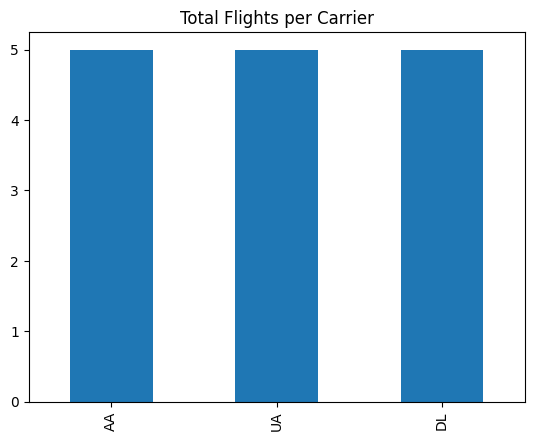

In [0]:
import matplotlib.pyplot as plt
df['CARRIER'].value_counts().plot(kind='bar')
plt.title('Total Flights per Carrier')
plt.show()